In [9]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_27656/992486428.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# 1) Write a Python function that builds and trains the model,
# and outputs the final predictions and losses.

In [13]:
def train(x, y, num_epochs, lr):
    losses = torch.zeros(num_epochs)
    
    model = nn.Sequential(
        nn.Linear(1,1),
        nn.ReLU(),
        nn.Linear(1,1)
    )
    
    loss_func = nn.MSELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    
    for i in range(num_epochs):
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        losses[i] = loss
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() # parameter update
    
    final_pred = model(x)
    final_loss = loss_func(final_pred, y).item()
    corr_coef = round(np.corrcoef(y.detach().T, final_pred.detach().T)[0,1], 2)
    
    return final_loss, corr_coef

In [4]:
# 2) Write a function that creates the data and outputs x, y.
# y = mx+randn/2. N=50.

In [5]:
def create_train_ds(slope, N=50, denominator=2):
    x = torch.randn(N, 1)
    y = slope * x + torch.randn(N, 1)/denominator
    return x, y

In [6]:
# 3) In a parametric experiment, vary the slope from -2 to +2 in 21 steps.
# Repeat the entire experiment 50 times.

In [18]:
results = []

for _ in tqdm(range(50)):
    for slope in np.linspace(-2, 2, 21):
        x, y = create_train_ds(slope=slope)
        loss, coef = train(x, y, num_epochs=100, lr=0.01)
        results.append((slope, loss, coef))

  0%|          | 0/50 [00:00<?, ?it/s]c:\Users\minji\.conda\envs\workspace\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\minji\.conda\envs\workspace\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
100%|██████████| 50/50 [01:58<00:00,  2.38s/it]


In [19]:
result_df = pd.DataFrame(results, columns=['slope', 'loss', 'coef'])
result_df.head()

,slope,loss,coef
0,-2.0,1.983132,0.65
1,-1.8,3.637179,NaN
2,-1.6,0.621846,0.90
3,-1.4,2.306488,NaN
4,-1.2,1.356023,NaN


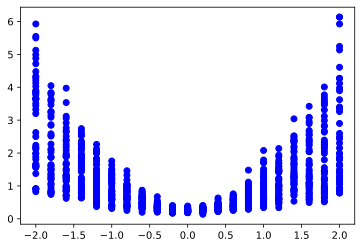

In [24]:
result_df = result_df.fillna(0)
plt.plot(result_df['slope'], result_df['loss'], 'bo')
plt.show()

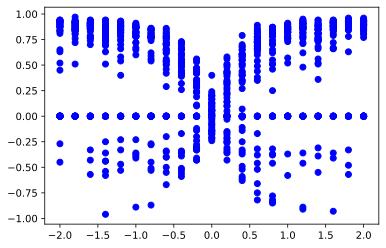

In [25]:
plt.plot(result_df['slope'], result_df['coef'], 'bo')
plt.show()